In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('datasets/data_science_job.csv')

In [19]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [20]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [21]:
df.shape

(19158, 13)

In [22]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [23]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
2812,0.527,no_enrollment,Graduate,5.0,17.0
7210,0.897,no_enrollment,Masters,5.0,57.0
11165,0.493,no_enrollment,Graduate,6.0,15.0
9654,0.866,Full time course,Graduate,6.0,108.0
997,0.754,no_enrollment,Graduate,15.0,42.0


In [24]:
len(df[cols])

19158

In [25]:
len(df[cols].dropna())

17182

In [26]:
len(df)

19158

In [27]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [28]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

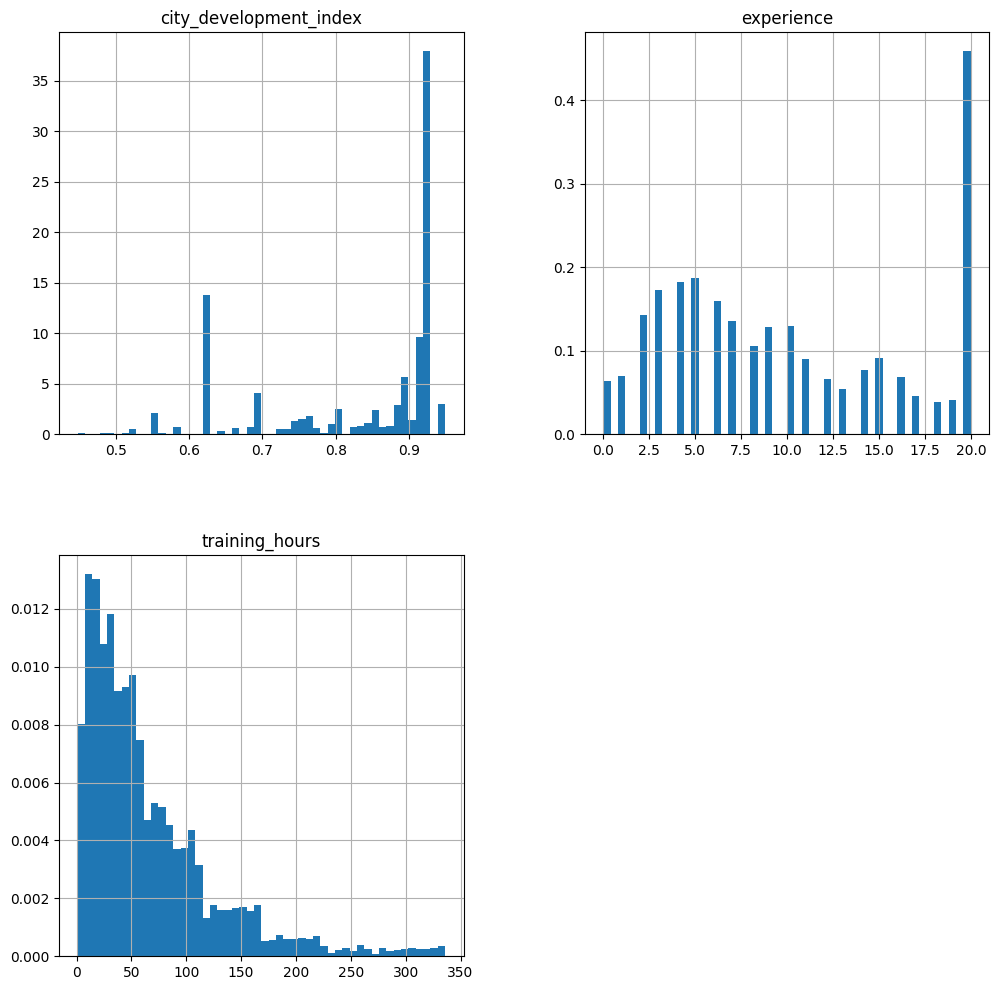

In [34]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

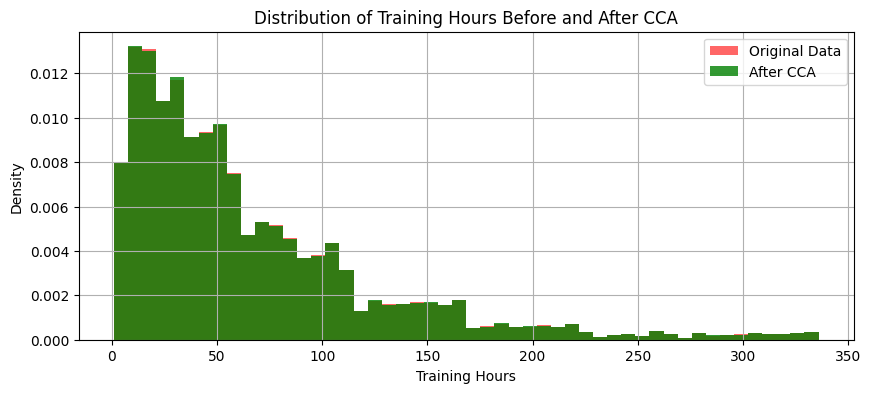

In [50]:
fig, ax = plt.subplots(figsize=(10, 4))  

# The argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
# Plot histogram for original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red', alpha=0.6, label="Original Data")

# Plot histogram for data after CCA
new_df['training_hours'].hist(bins=50, ax=ax, density=True, color='green', alpha=0.8, label="After CCA")

# Add labels and legend
ax.set_xlabel("Training Hours")
ax.set_ylabel("Density")
ax.set_title("Distribution of Training Hours Before and After CCA")
ax.legend()

plt.show()


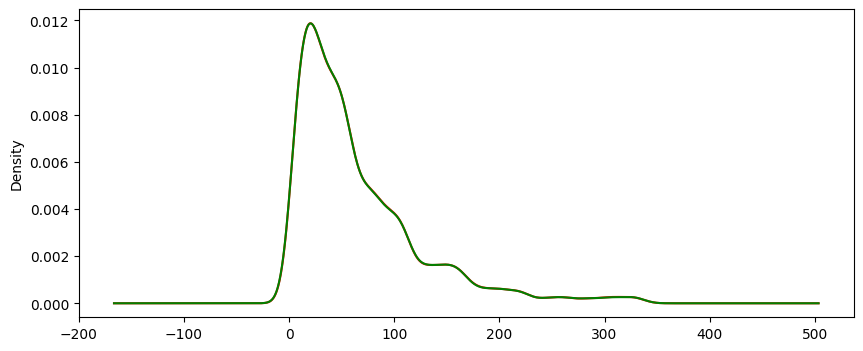

In [44]:
fig,ax = plt.subplots(figsize=(10,4))

# original data
df['training_hours'].plot.density(color='red',ax=ax)

# data after cca
new_df['training_hours'].plot.density(color='green',ax=ax)
plt.show()

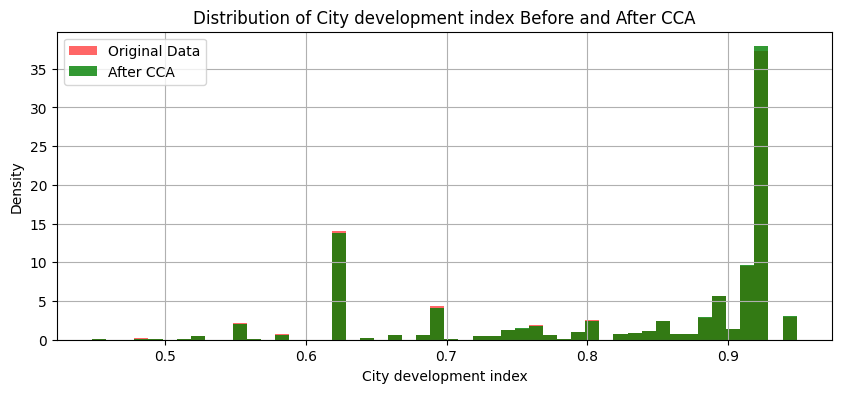

In [52]:
fig, ax = plt.subplots(figsize=(10, 4))  

# Plot histogram for original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red', alpha=0.6, label="Original Data")

# Plot histogram for data after CCA
new_df['city_development_index'].hist(bins=50, ax=ax, density=True, color='green', alpha=0.8, label="After CCA")

# Add labels and legend
ax.set_xlabel("City development index")
ax.set_ylabel("Density")
ax.set_title("Distribution of city_development_index Before and After CCA")
ax.legend()

plt.show()

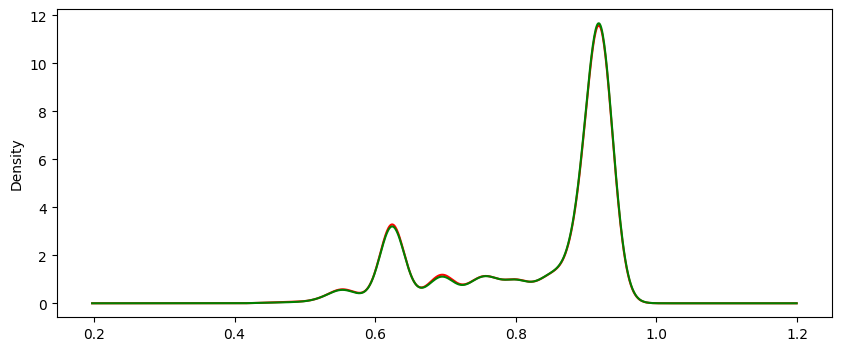

In [53]:
fig,ax = plt.subplots(figsize=(10,4))

# original data
df['city_development_index'].plot.density(color='red',ax=ax)

# data after cca
new_df['city_development_index'].plot.density(color='green',ax=ax)
plt.show()

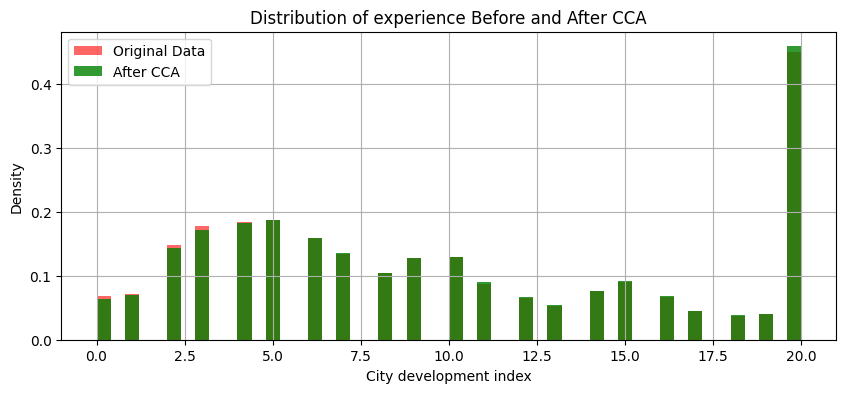

In [54]:
fig, ax = plt.subplots(figsize=(10, 4))  

# Plot histogram for original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red', alpha=0.6, label="Original Data")

# Plot histogram for data after CCA
new_df['experience'].hist(bins=50, ax=ax, density=True, color='green', alpha=0.8, label="After CCA")

# Add labels and legend
ax.set_xlabel("City development index")
ax.set_ylabel("Density")
ax.set_title("Distribution of experience Before and After CCA")
ax.legend()

plt.show()

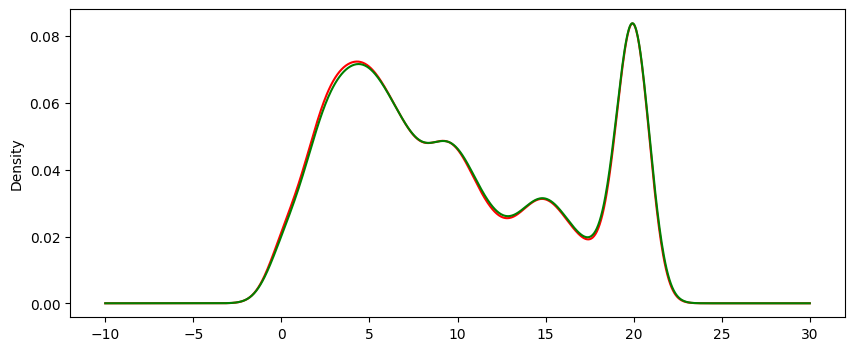

In [55]:
fig,ax = plt.subplots(figsize=(10,4))

# original data
df['experience'].plot.density(color='red',ax=ax)

# data after cca
new_df['experience'].plot.density(color='green',ax=ax)
plt.show()

In [57]:
df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [64]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [65]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [67]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
